In [1]:
import csv
import networkx as nx
import numpy as np
from tqdm.auto import tqdm


file_names_auto = ["D1-UNC.csv","D2-UNC.csv","D3-UNC.csv"]
graphs_auto = {
}

for file_name in file_names_auto:
        with open(f"competition_data\{file_name}", 'r') as file:
                reader = csv.reader(file)
                adj_matrix = np.array([list(map(int, row)) for row in reader])

        g = nx.from_numpy_array(adj_matrix)
        graphs_auto[file_name]=g

<string>:12: SyntaxWarning: invalid escape sequence '\{'
<>:12: SyntaxWarning: invalid escape sequence '\{'
<string>:12: SyntaxWarning: invalid escape sequence '\{'
<>:12: SyntaxWarning: invalid escape sequence '\{'
C:\Users\1234o\AppData\Local\Temp\ipykernel_24552\2382550869.py:12: SyntaxWarning: invalid escape sequence '\{'
  with open(f"competition_data\{file_name}", 'r') as file:
c:\Users\1234o\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np
import networkx as nx
from sklearn.cluster import KMeans

def custom_kmeans(X, n_clusters, iterations=1000, eps=1e-4):
    """
    Custom implementation of the KMeans algorithm.

    Args:
        X : numpy.ndarray
            The data to cluster, shape (n_samples, n_features).
        n_clusters : int
            The number of clusters.
        max_iter : int
            Maximum number of iterations for the algorithm.
        tol : float
            Tolerance for convergence.

    Returns:
        tuple
            A tuple (labels, centroids):
                labels: numpy.ndarray, shape (n_samples,)
                    Cluster assignments for each sample.
                centroids: numpy.ndarray, shape (n_clusters, n_features)
                    Cluster centroids.
    """
    n_samples, _ = X.shape
    indices = np.random.choice(n_samples, n_clusters, replace=False)
    centroids = X[indices]

    for iteration in range(iterations):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == k].mean(axis=0) if np.any(labels == k) else centroids[k] for k in range(n_clusters)])
        if np.linalg.norm(new_centroids - centroids) < eps:
            break
        centroids = new_centroids

    return labels, centroids


def spectral_community_detection(G, number_of_communities, use_custom_kmeans = False):
    """
    Implements the spectral method for community detection.

    Args:
        G : networkx.Graph
            The input graph. The graph should be undirected and connected.
        number_of_communities : int
            The number of communities to detect.

    Returns:
        dict
            A dictionary with nodes as keys and communitys as values.
    """
    laplacian_matrix = nx.normalized_laplacian_matrix(G).toarray()

    _, eigvecs = np.linalg.eigh(laplacian_matrix)
    eigvecs_subset = eigvecs[:, 1:number_of_communities]

    if use_custom_kmeans:
        labels = custom_kmeans(eigvecs_subset, n_clusters=number_of_communities)[0]
    else:
        kmeans = KMeans(number_of_communities)
        kmeans.fit(eigvecs_subset)
        labels = kmeans.labels_

    communities = {node: label for node, label in zip(G.nodes(), labels)}

    return communities




In [3]:
import numpy as np
import networkx as nx
from sklearn.cluster import KMeans

def spectral_community_detection_auto(G):
    """
    Implements the spectral method for community detection with automatic 
    determination of the number of communities.

    Args:
        G : networkx.Graph
            The input graph. The graph should be undirected and connected.

    Returns:
        dict
            A dictionary with node ids as keys and community ids as values.
    """
    # Step 1: Compute the normalized Laplacian matrix
    L = nx.normalized_laplacian_matrix(G).toarray()

    # Step 2: Compute eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eigh(L)

    # Step 3: Use the eigengap heuristic to determine the number of communities
    eigengap = np.diff(eigvals)
    optimal_k = np.argmax(eigengap) + 1  # Adding 1 because indices are zero-based

    # Step 4: Select the eigenvectors corresponding to the smallest eigenvalues (excluding the first one)
    eigvecs_subset = eigvecs[:, 1:optimal_k + 1]

    # Step 5: Perform k-means clustering on the eigenvectors
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    labels = kmeans.fit_predict(eigvecs_subset)

    # Step 6: Assign community labels to nodes
    communities = {node: label for node, label in zip(G.nodes(), labels)}

    return communities


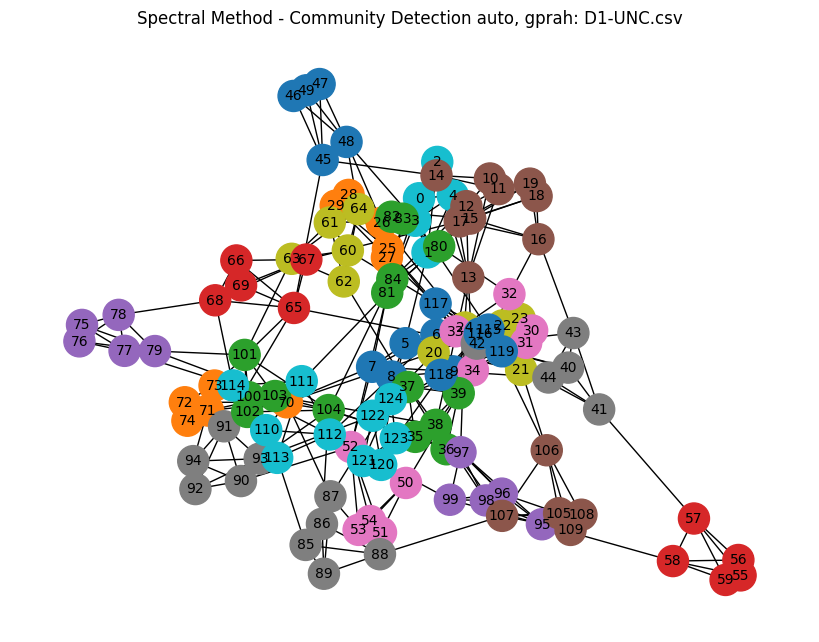

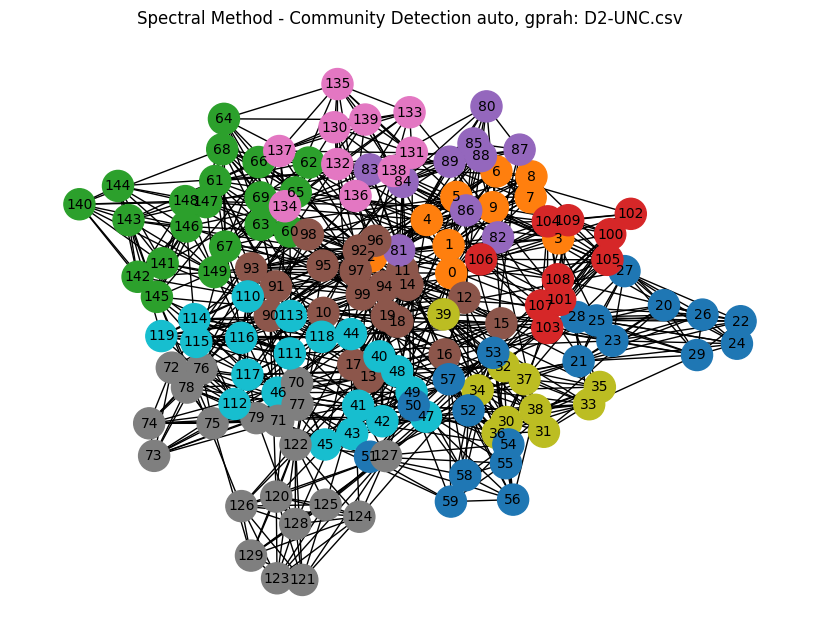

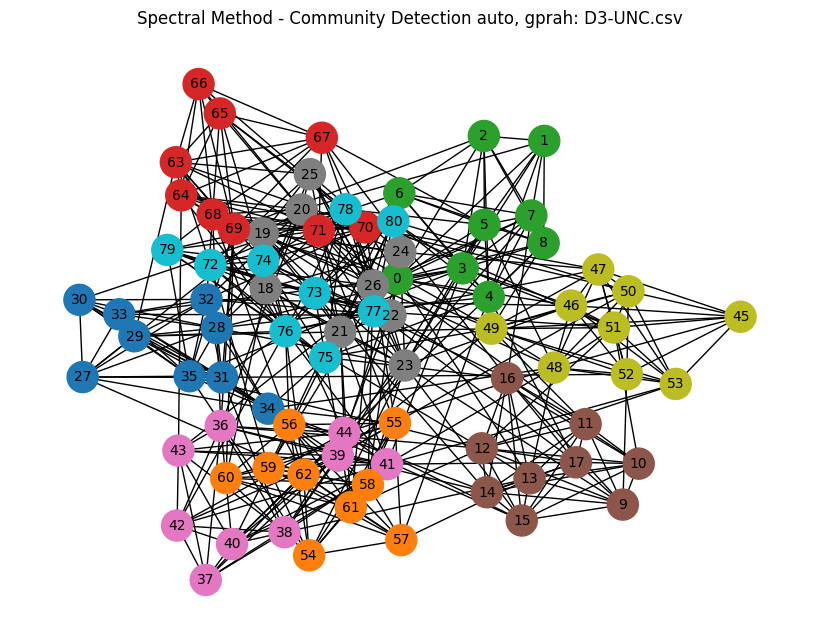

In [4]:
auto_graph_partitions = {}
for auto_graph_name in graphs_auto:
    g= graphs_auto[auto_graph_name]
    partition = spectral_community_detection_auto(g)
    auto_graph_partitions[auto_graph_name] = partition
    import matplotlib.pyplot as plt

    # Color nodes by their community assignment
    node_colors = [partition[node] for node in g.nodes()]
    pos = nx.spring_layout(g)
    plt.figure(figsize=(8, 6))
    nx.draw(g, pos, node_color=node_colors, with_labels=True, cmap=plt.cm.tab10, node_size=500, font_size=10)
    plt.title(f"Spectral Method - Community Detection auto, gprah: {auto_graph_name}")
    plt.show()

In [5]:
file_names_k = ["D1-K=2.csv","D2-K=7.csv","D3-K=12.csv"]
number_of_communities = {
    "D1-K=2.csv":2,"D2-K=7.csv":7,"D3-K=12.csv":12
}
graphs_k = {
}

for file_name in file_names_k:
        with open(f"competition_data\{file_name}", 'r') as file:
                reader = csv.reader(file)
                adj_matrix = np.array([list(map(int, row)) for row in reader])

        g = nx.from_numpy_array(adj_matrix)
        graphs_k[file_name]=g

<string>:9: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\{'
<string>:9: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\{'
C:\Users\1234o\AppData\Local\Temp\ipykernel_24552\2698730103.py:9: SyntaxWarning: invalid escape sequence '\{'
  with open(f"competition_data\{file_name}", 'r') as file:


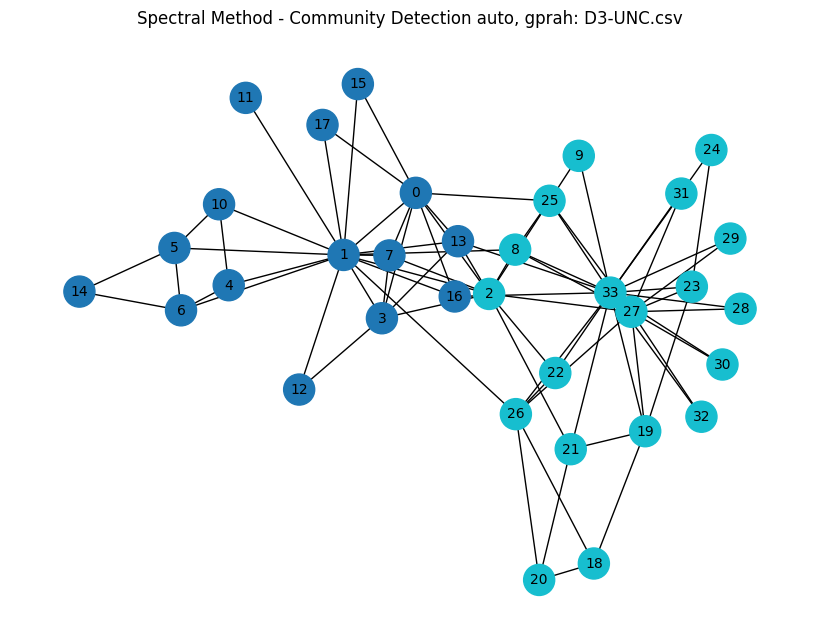

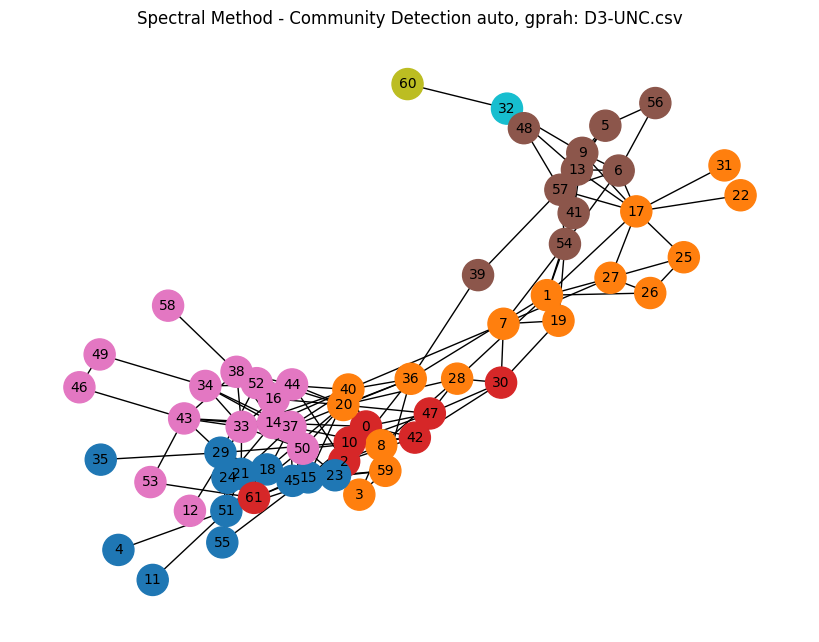

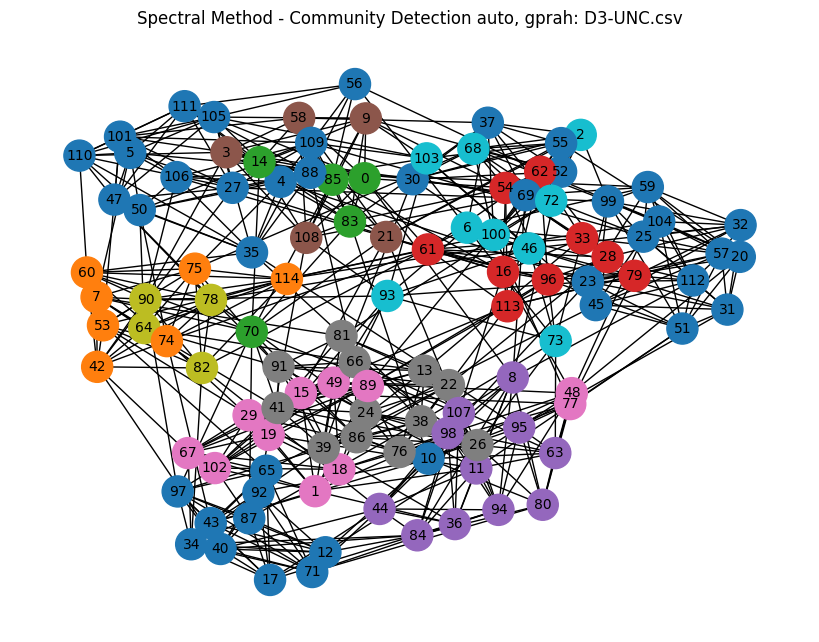

In [6]:
for k_graph_name in graphs_k:
    g= graphs_k[k_graph_name]
    n = number_of_communities[k_graph_name]
    partition = spectral_community_detection(g,n,True)

    import matplotlib.pyplot as plt

    # Color nodes by their community assignment
    node_colors = [partition[node] for node in g.nodes()]
    pos = nx.spring_layout(g)
    plt.figure(figsize=(8, 6))
    nx.draw(g, pos, node_color=node_colors, with_labels=True, cmap=plt.cm.tab10, node_size=500, font_size=10)
    plt.title(f"Spectral Method - Community Detection auto, gprah: {auto_graph_name}")
    plt.show()

In [7]:
from sklearn.metrics import adjusted_rand_score


def check_u(partition, blocksize=5):
    target = sorted(list(range(len(partition)//blocksize)) * blocksize)
    return adjusted_rand_score(np.array(target), np.array([partition[k] for k in range(len(partition))]))
    

check_u(partition)

-0.006046006329412876

In [8]:
for partition_name in auto_graph_partitions:
    partition = auto_graph_partitions[partition_name]
    num_of_communities = len(set(partition.values()))
    print(f"{partition_name} : {check_u(partition,num_of_communities)}")

D1-UNC.csv : 0.24390243902439024
D2-UNC.csv : 0.6089238845144357
D3-UNC.csv : 1.0


In [9]:
print("number of communities:")
for partition_name in auto_graph_partitions:
    partition = auto_graph_partitions[partition_name]
    num_of_communities = len(set(partition.values()))
    print(f"{partition_name} : {len(set(partition.values()))}")

number of communities:
D1-UNC.csv : 25
D2-UNC.csv : 15
D3-UNC.csv : 9


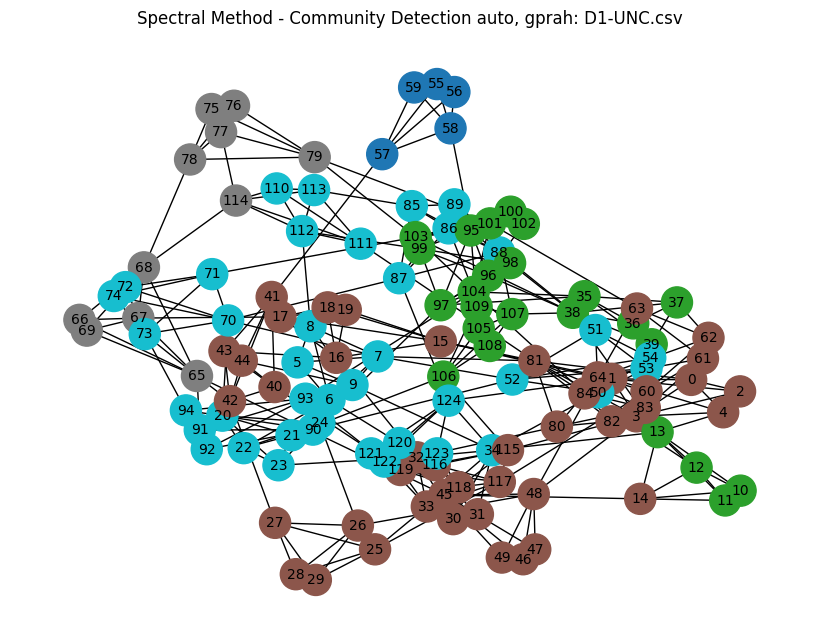

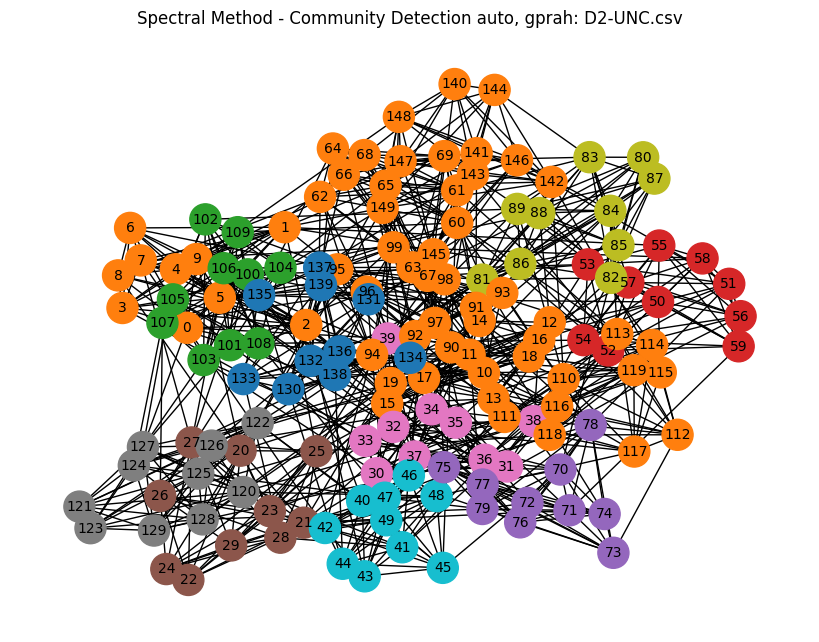

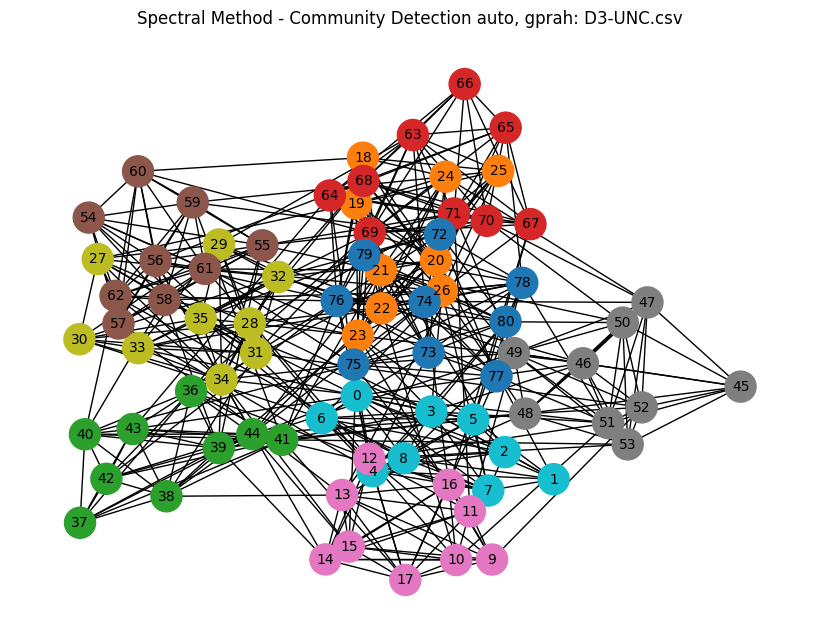

In [10]:
auto_not_graph_partitions = {}
number_of_communities_auto_not = {
    "D1-UNC.csv":5,"D2-UNC.csv":10,"D3-UNC.csv":9
}
for auto_graph_name in graphs_auto:
    g= graphs_auto[auto_graph_name]
    cn = number_of_communities_auto_not[auto_graph_name]
    partition = spectral_community_detection(g,cn)
    auto_not_graph_partitions[auto_graph_name] = partition
    import matplotlib.pyplot as plt

    # Color nodes by their community assignment
    node_colors = [partition[node] for node in g.nodes()]
    pos = nx.spring_layout(g)
    plt.figure(figsize=(8, 6))
    nx.draw(g, pos, node_color=node_colors, with_labels=True, cmap=plt.cm.tab10, node_size=500, font_size=10)
    plt.title(f"Spectral Method - Community Detection auto, gprah: {auto_graph_name}")
    plt.show()

In [11]:
for partition_name in auto_not_graph_partitions:
    partition = auto_not_graph_partitions[partition_name]
    num_of_communities = len(set(partition.values()))
    print(f"{partition_name} : {check_u(partition,num_of_communities)}")

D1-UNC.csv : 0.15273528686801316
D2-UNC.csv : 0.42023346303501946
D3-UNC.csv : 1.0
